# Data Pre-processing

In [43]:
# Import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [44]:
data_dir = 'data'

In [45]:
df = pd.read_csv(os.path.join(data_dir, 'vehicles_concat.csv'))

df

,price,model,condition,fuel,odometer,transmission,size,type,paint_color
0,24895.0,jeep-cherokee,other,gas,6973.0,automatic,other,SUV,white
1,12999.0,nissan-altima,other,gas,63810.0,other,other,sedan,other
2,12799.0,hyundai-elantra,other,gas,80210.0,automatic,other,sedan,silver
3,17850.0,ford-f150,other,gas,76393.0,automatic,other,other,white
4,24150.0,dodge-challenger,other,gas,74540.0,automatic,other,coupe,white
...,...,...,...,...,...,...,...,...,...
103665,33064.0,ram-1500,other,gas,42920.0,automatic,other,other,black
103666,27987.0,toyota-tacoma,other,other,44444.0,automatic,other,other,other
103667,32663.0,chevrolet-traverse,other,gas,18498.0,automatic,other,SUV,silver
103668,22986.0,chevrolet-equinox,other,gas,21598.0,automatic,other,SUV,white


In [46]:
df[df['price'] < 1000]

,price,model,condition,fuel,odometer,transmission,size,type,paint_color


In [47]:
df = df.sample(frac=1)

In [48]:
def one_hot_encode(df, feature):
    dummies = pd.get_dummies(df[feature], prefix=feature)
    
    df = pd.concat([df, dummies], axis=1)
    
    return df

In [49]:
encoded_df = df.copy()

features = ['transmission', 'paint_color', 'fuel', 'condition', 'size', 'type', 'model']

for feature in features:
    encoded_df = one_hot_encode(encoded_df, feature)
    
encoded_df = encoded_df.drop(columns=features[:-1])

In [50]:
encoded_df.to_csv(os.path.join(data_dir, 'vehicles_encoded.csv'), index=False)

In [51]:
import math

split_idx = math.ceil(len(df) / 2)

train_data, test_data = encoded_df[:split_idx], encoded_df[split_idx:]

split_idx = math.ceil(len(test_data) / 2)

valid_data, test_data = test_data[:split_idx], test_data[split_idx:]

train_data.shape, valid_data.shape, test_data.shape

((51835, 295), (25918, 295), (25917, 295))

Text(0.5, 0, 'price')

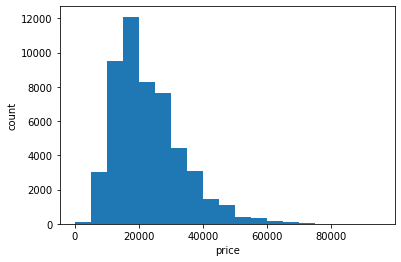

In [52]:
bin_edges = np.arange(0, train_data['price'].max()+5000, 5000)
plt.hist(x=train_data['price'], bins=bin_edges)
plt.ylabel('count')
plt.xlabel('price')

In [53]:
train_model_counts = train_data['model'].value_counts()
train_model_counts = train_model_counts[train_model_counts > 5]

train_data = train_data[train_data['model'].isin(train_model_counts.index)]

train_model_counts

chevrolet-silverado    2862
ford-f150              2760
ram-1500               2036
gmc-sierra             1376
jeep-cherokee          1133
                       ... 
gmc-3500                 15
chevrolet-3500           13
gmc-2500                 12
mercedes-benz-e350        8
dodge-2500                7
Name: model, Length: 237, dtype: int64

In [54]:
y = train_data['model']
X = train_data.drop(columns='model')

In [55]:
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

X_resampled, y_resampled = SMOTEENN().fit_sample(X,y)

In [56]:
resampled_df = X_resampled.copy()

resampled_df['model'] = y_resampled

resampled_df

,price,odometer,transmission_automatic,transmission_manual,transmission_other,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,...,model_volkswagen-beetle,model_volkswagen-golf,model_volkswagen-gti,model_volkswagen-jetta,model_volkswagen-passat,model_volkswagen-tiguan,model_volvo-s60,model_volvo-xc60,model_volvo-xc90,model
0,15367.000000,74455.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acura-ilx
1,19200.000000,25499.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acura-ilx
2,15450.000000,27485.000000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acura-ilx
3,18400.000000,16401.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acura-ilx
4,19391.000000,16546.000000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,acura-ilx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213939,32998.000000,58313.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,volvo-xc90
213940,32243.154258,55768.175418,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,volvo-xc90
213941,35275.564211,68830.369792,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,volvo-xc90
213942,32998.000000,58313.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,volvo-xc90


Text(0.5, 0, 'price')

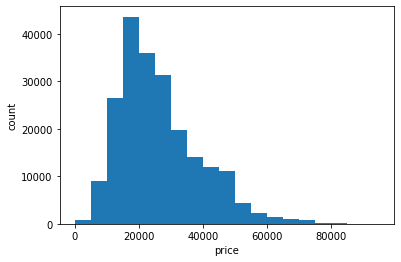

In [57]:
plt.hist(x=resampled_df['price'], bins=bin_edges)
plt.ylabel('count')
plt.xlabel('price')

In [58]:
resampled_df.to_csv(os.path.join(data_dir, 'vechiles_train_resampled.csv'), index=False)

In [59]:
train_data = resampled_df.drop(columns='model')
valid_data = valid_data.drop(columns='model')
test_data = test_data.drop(columns='model')

In [60]:
train_data = train_data.sample(frac=1)

train_data

,price,odometer,transmission_automatic,transmission_manual,transmission_other,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,...,model_volkswagen-atlas,model_volkswagen-beetle,model_volkswagen-golf,model_volkswagen-gti,model_volkswagen-jetta,model_volkswagen-passat,model_volkswagen-tiguan,model_volvo-s60,model_volvo-xc60,model_volvo-xc90
115874,28834.643490,81924.723632,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142481,39929.000000,14920.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131927,28052.516737,75448.141131,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76825,28900.000000,191329.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122038,24275.000000,9464.611113,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47655,8925.537544,61648.496047,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122840,20255.975183,69363.422278,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207055,13084.837016,3524.411651,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80681,24990.000000,102354.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split

y_test = pd.DataFrame(test_data['price'])
X_test = test_data.drop(columns='price')

y_train = pd.DataFrame(train_data['price'])
X_train = train_data.drop(columns='price')

y_valid = pd.DataFrame(valid_data['price'])
X_valid = valid_data.drop(columns='price')

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(213944, 293)
(25918, 293)
(25917, 293)


In [62]:
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)
y_test.to_csv(os.path.join(data_dir, 'test_y.csv'), header=False, index=False)

pd.concat([y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)
pd.concat([y_valid, X_valid], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)